# Visualizing Data - Extensions

`ggplot2` is extensible and several packages have been developed to add to the functionality of `ggplot`, while maintaining the consistent grammar/syntax

![ggplot_extensions.png](images/ggplot_extensions.png)

An excellent resource for ggplot2 libraries can be found here: https://exts.ggplot2.tidyverse.org/gallery/
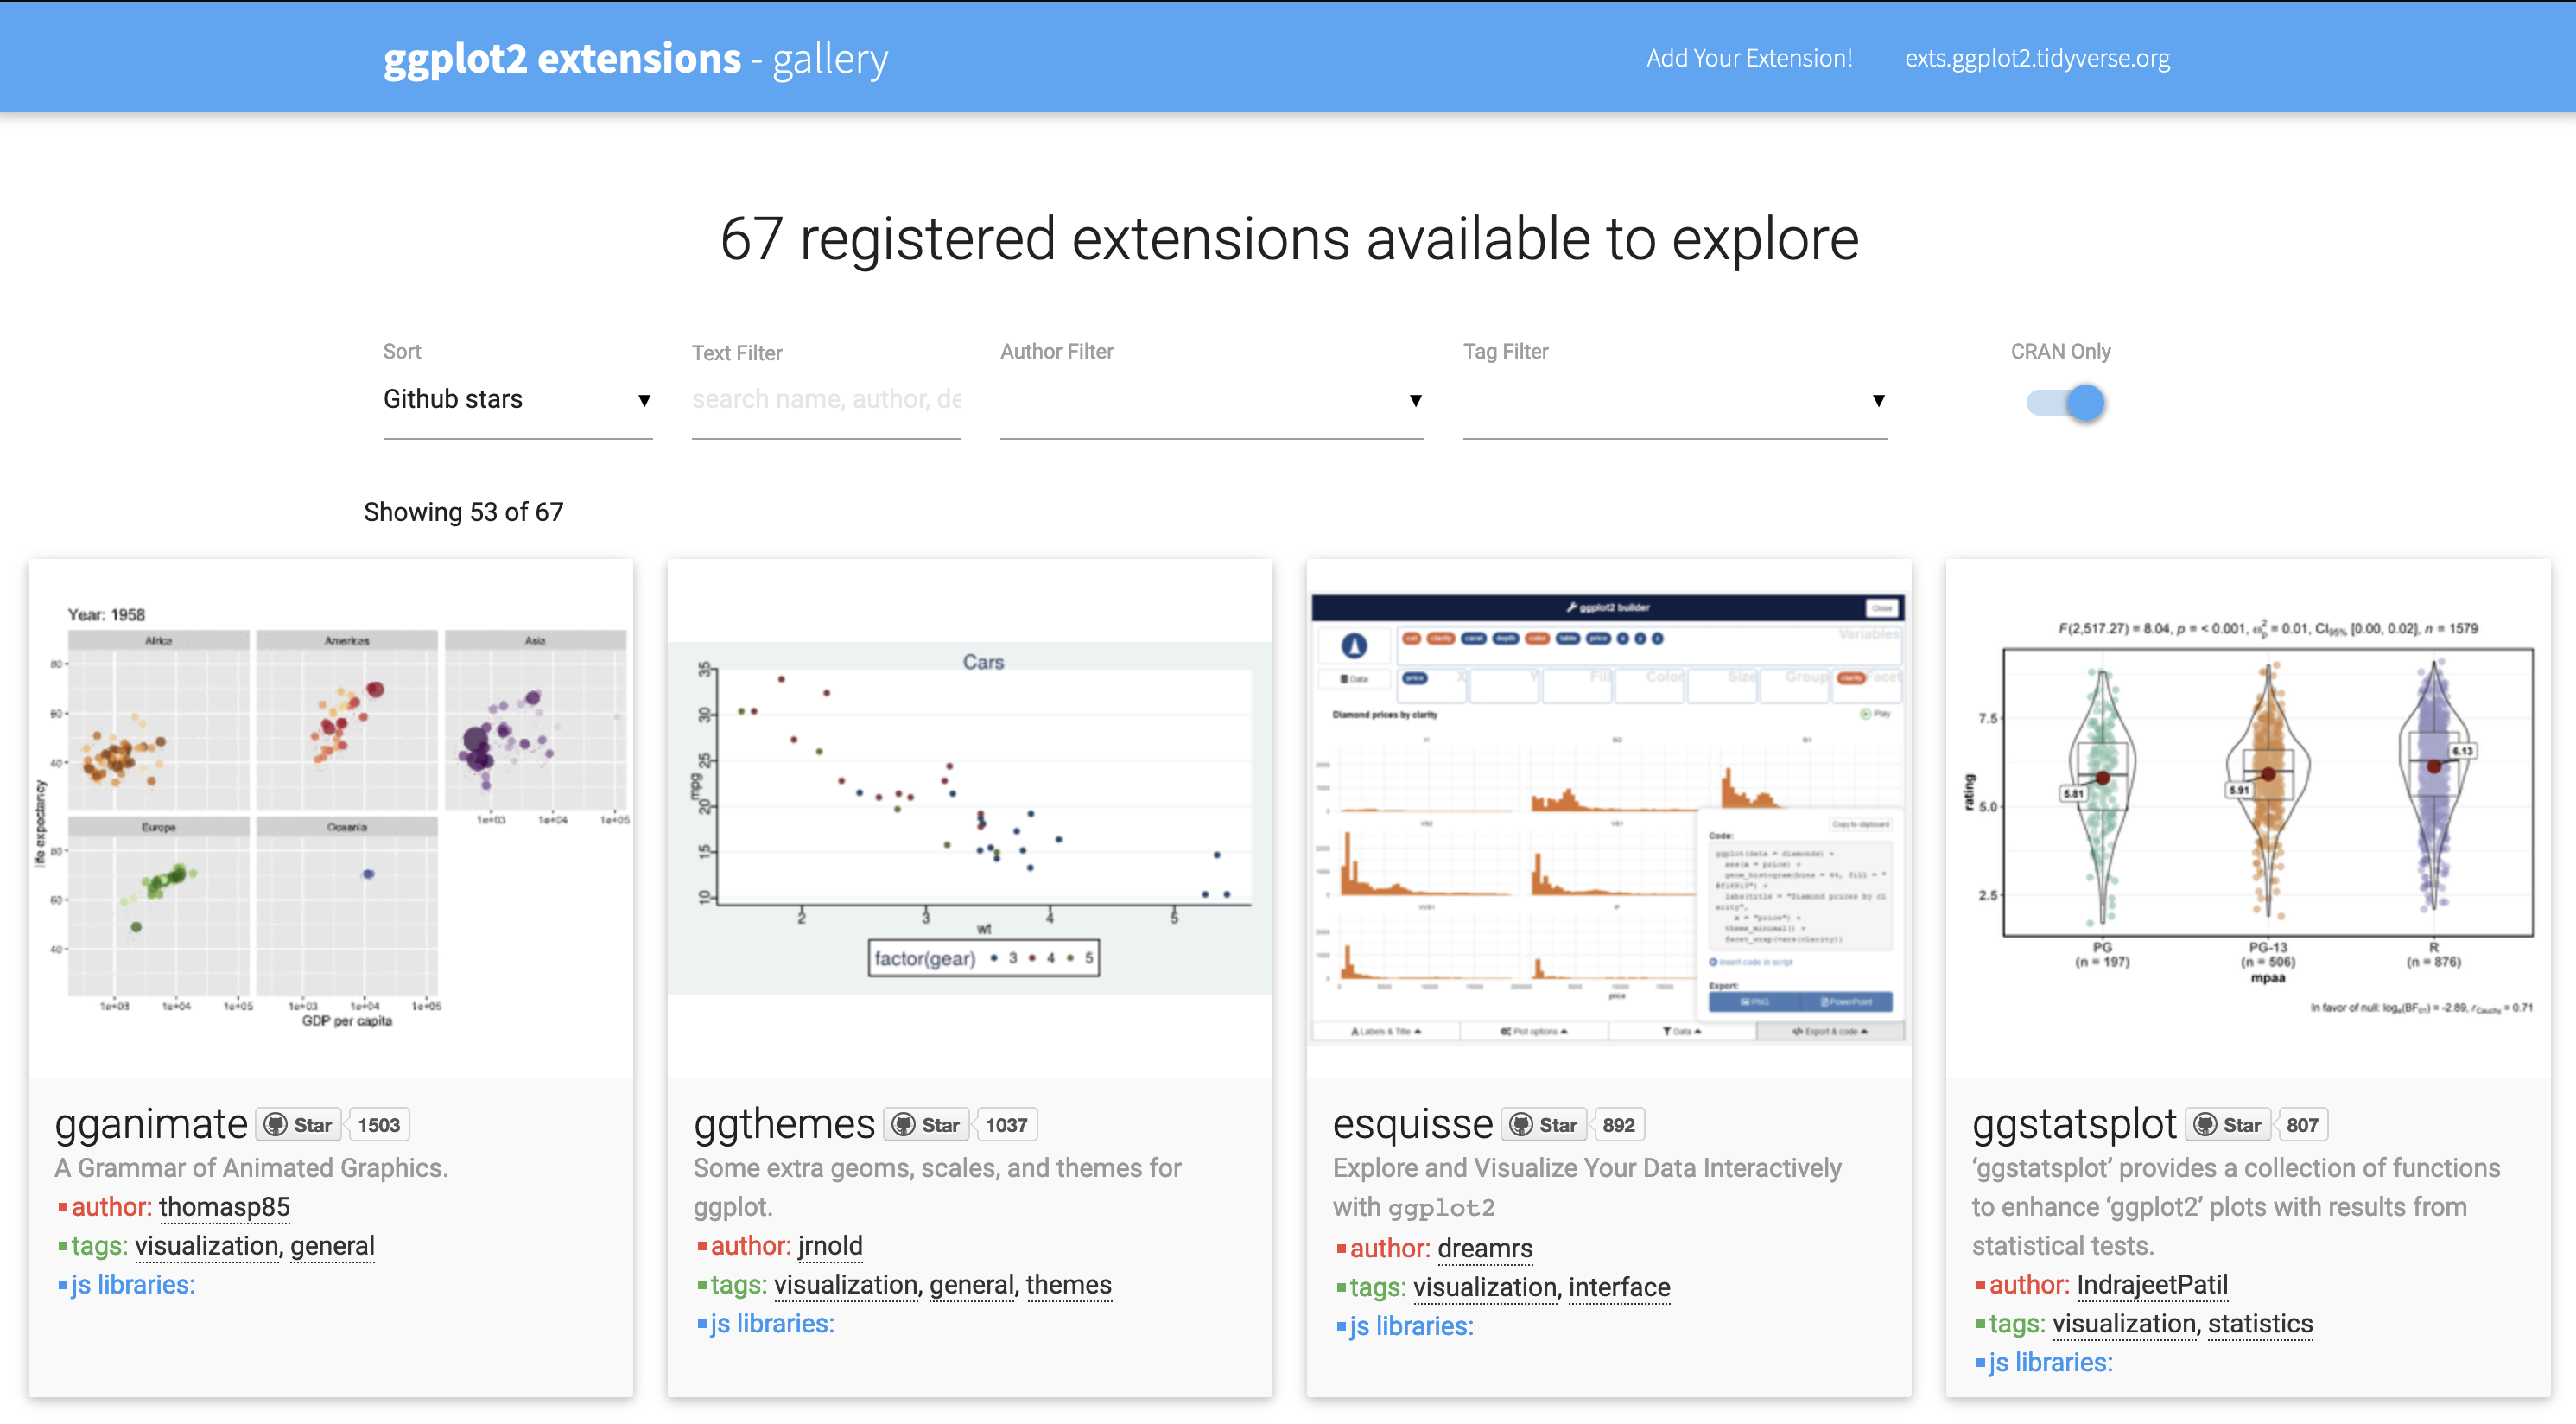

---
## Data preparation

We will import a dataset from the Framingham study, which was a long term study of cardiovascular disease about subjects in Framingham, USA. In this dataset
- ~4000 subjects followed up and clinical data and chronic heart disease outcomes were examined longitudinally over > 10 years

The variables include

- `male` : 0 = female, 1 = male
- `age` : Age at the time of medical examination in years.
- `education` : 1 = Some high school, 2 = high school/GED, 3 = some college/vocational school, 4 = college
- `currentSmoker`: Current cigarette smoking at the time of examinations
- `cigsPerDay`: Number of cigarettes smoked each day
- `BPmeds`: Use of Anti-hypertensive medication at exam
- `prevalentStroke`: Prevalent Stroke 
- `prevalentHyp`: Prevalent Hypertensive
- `diabetes`: Diabetic according to criteria of first exam treated
- `totChol`: Total cholesterol (mg/dL)
- `sysBP`: Systolic Blood Pressure (mmHg)
- `diaBP`: Diastolic blood pressure (mmHg)
- `BMI`: Body Mass Index, weight (kg)/height (m)^2
- `heartRate`: Heart rate (beats/minute)
- `glucose`: Blood glucose level (mg/dL)

In [ ]:
library(tidyverse)

data <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/framingham.csv")

# renaming column & changing data type of columns
data <- data %>% 
        rename(sex = male) %>% 
        mutate(sex = as.factor(sex),
               age = as.integer(age),
               education = as.factor(education),
               currentSmoker = as.factor(currentSmoker),
               cigsPerDay = as.integer(cigsPerDay),
               BPMeds = as.factor(BPMeds),
               prevalentStroke = as.factor(prevalentStroke),
               prevalentHyp = as.factor(prevalentHyp),
               diabetes = as.factor(diabetes),
               totChol = as.integer(totChol),
               heartRate = as.integer(heartRate),
               TenYearCHD = as.factor(TenYearCHD)
               )

# transforming any units
data <- data %>% 
        mutate(glucose = round(glucose/18, digits=1)) %>% # mg/dL to mmol/L
        mutate(totChol = round(totChol/39, digits=1))     # mg/dL to mmol/L

head(data)

## Example of an extension package to ggplot2

We will demonstrate `GGally`, a package that extends the functionality of `ggplot2`

https://ggobi.github.io/ggally/index.html

In [ ]:
library(GGally)

In [ ]:
# look at documentation for GGally

help(package="GGally")

We will look at `ggpairs` function that is useful for exploratory analysis of pairwise relationship between different variables in a dataset

As an example, we will select a mix of continuous and categorical variables and plot the pairwise relationships

In [ ]:
# adjust size of the image output
options(repr.plot.width=20, repr.plot.height=20)

data %>% 
select(sex, 
       age, 
       currentSmoker, 
       diabetes, 
       totChol, 
       glucose, 
       sysBP) %>% 
ggpairs()